In [13]:
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
solutions = []
for file in os.listdir('solutions_beats_5_enemies'):
    if file.startswith('pymoo'):
        new_solution = []
        with open(f'solutions_beats_5_enemies/{file}') as f:
            solutions.append(f.read().splitlines())
            
solutions = np.array(solutions, dtype=float)

In [11]:
def cosine_similarity(v1, v2):
    v1_norm = np.linalg.norm(v1)
    v2_norm = np.linalg.norm(v2)
    return np.dot(v1, v2) / (v1_norm * v2_norm)

def cosine_similarity_matrix(vectors):
    return np.array([[cosine_similarity(v1, v2) for v2 in vectors] for v1 in vectors])

similarity_matrix = cosine_similarity_matrix(solutions)
print(similarity_matrix)

[[1.         0.2903466  0.37620028 0.22332126 0.25661166 0.25596293
  0.99873706 0.37730567 0.37723291 0.20535041 0.25618792 0.99869608
  0.25713022 0.20573862 0.25690048 0.25762294 0.28833864 0.99873767
  0.29086729 0.28803666 0.25602231 0.2570129  0.37542414]
 [0.2903466  1.         0.17668505 0.16186109 0.16990359 0.16958352
  0.29136229 0.17542471 0.17595038 0.2142127  0.16985714 0.29114029
  0.17030361 0.21453935 0.17020778 0.17086223 0.99978221 0.29147722
  0.9999671  0.99971798 0.16969658 0.17028908 0.17699583]
 [0.37620028 0.17668505 1.         0.24483487 0.23598054 0.23477985
  0.37463911 0.99980398 0.99981626 0.20487405 0.23596089 0.37431835
  0.23653635 0.20526604 0.23604842 0.23702839 0.17460565 0.37471159
  0.17697301 0.17453073 0.23603605 0.23617866 0.99991348]
 [0.22332126 0.16186109 0.24483487 1.         0.60586614 0.60496955
  0.22120215 0.24467605 0.24440577 0.82738806 0.60476969 0.22134817
  0.60560193 0.82735731 0.6053892  0.60511337 0.16326678 0.22131358
  0.162485

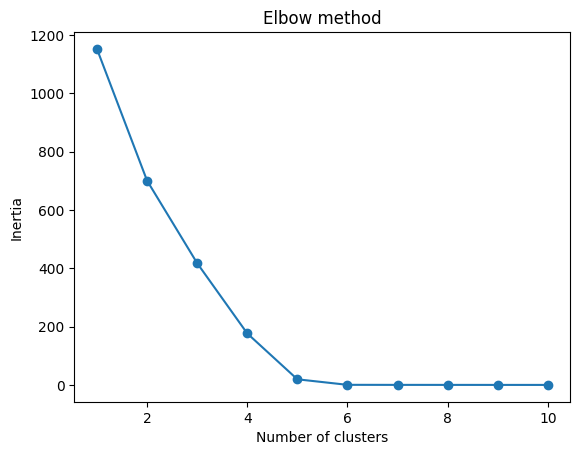

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(solutions)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

(23, 3)


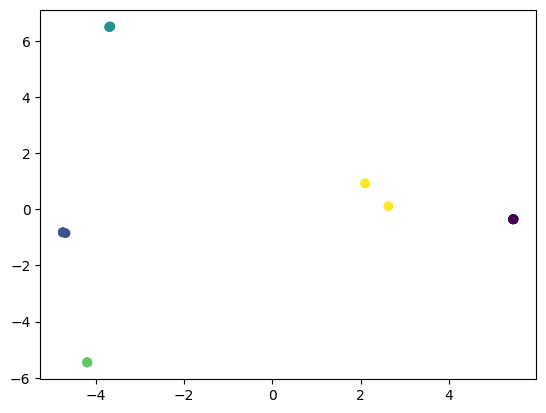

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pca = PCA(3)
solutions_transformed = pca.fit_transform(solutions)

kmeans = KMeans(n_clusters=5)
kmeans.fit(solutions)

print(solutions_transformed.shape)
plt.scatter(solutions_transformed[:,0], solutions_transformed[:,1], c=kmeans.labels_)
plt.show()

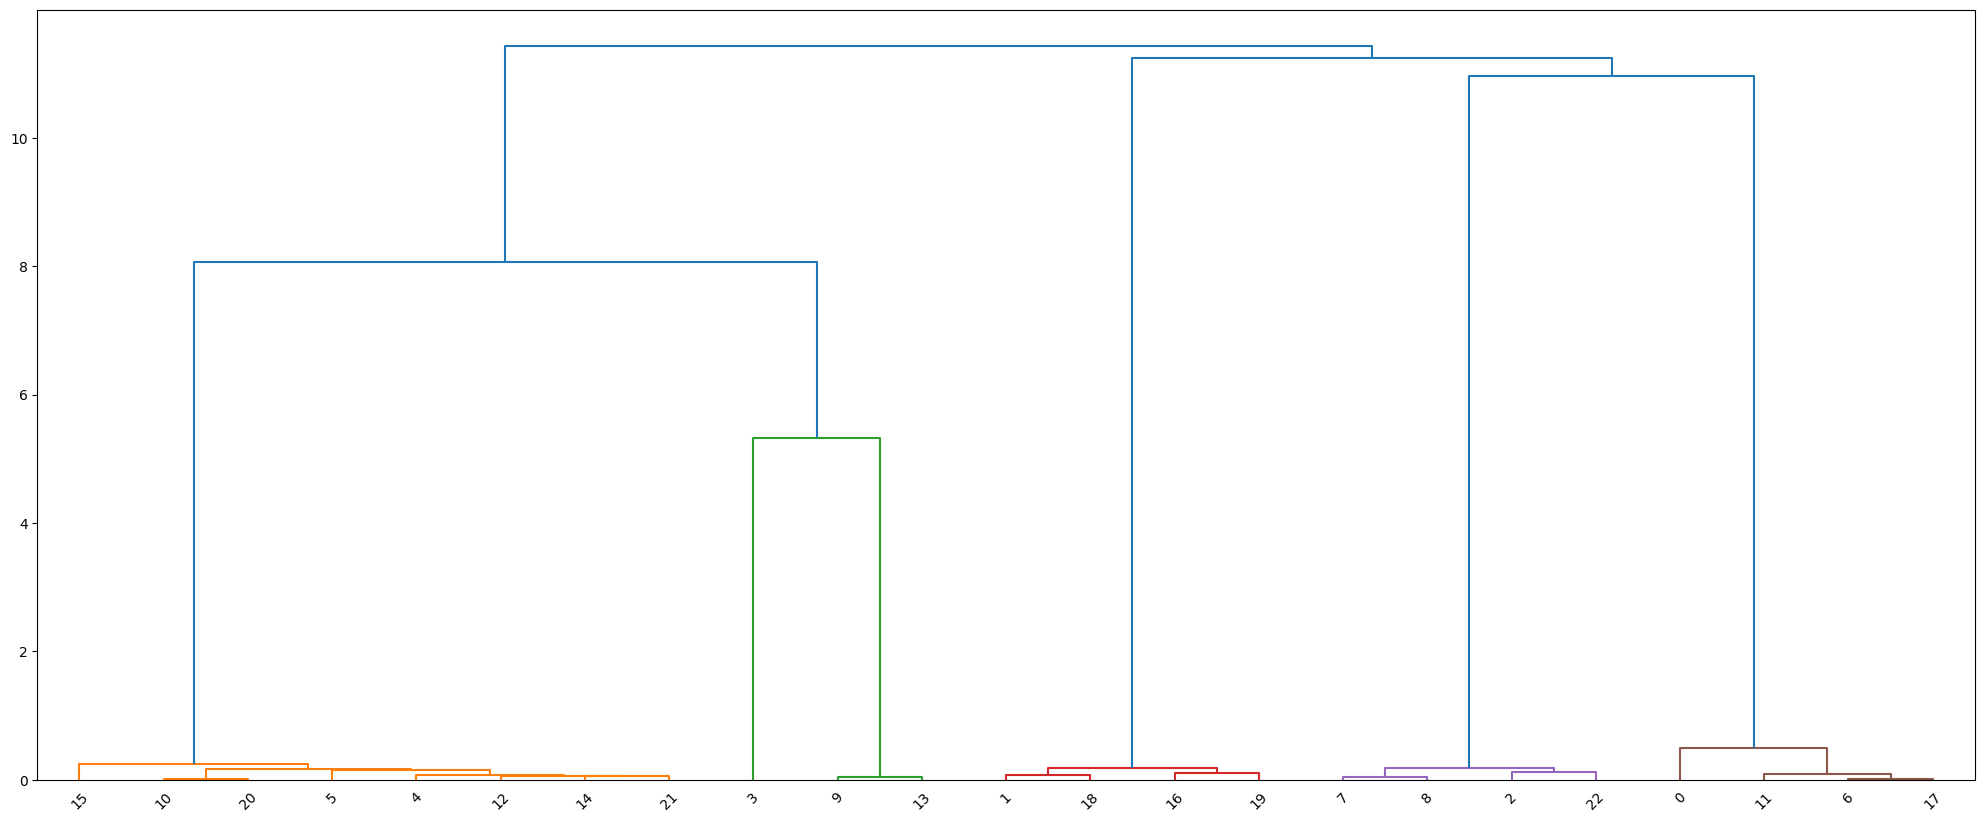

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform, pdist

dists = pdist(solutions)
linkage_matrix = linkage(dists, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix)